In [1]:
import math

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = r'\usepackage{libertine}' 
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

In [2]:
masterdata = pd.read_csv("../experiments/2019-03-28-21-31_BanditStaticScalingStrategies_/BanditStaticScalingStrategies.csv")
narms = masterdata.iloc[0]['k']

In [3]:
masterdata.tail(20)

,bandit,dataset,scalingstrategy,k,gain,cputime,iteration
4999980,MP-TS-ADWIN-0.1,StaticGenerator-100,KLP-1-100-0.9,20.08,17.97,3.6726,99980
4999981,MP-TS-ADWIN-0.1,StaticGenerator-100,KLP-1-100-0.9,20.21,18.14,3.0885,99981
4999982,MP-TS-ADWIN-0.1,StaticGenerator-100,KLP-1-100-0.9,20.19,18.26,3.3172,99982
4999983,MP-TS-ADWIN-0.1,StaticGenerator-100,KLP-1-100-0.9,20.13,18.23,3.0255,99983
4999984,MP-TS-ADWIN-0.1,StaticGenerator-100,KLP-1-100-0.9,20.05,18.16,4.7050,99984
4999985,MP-TS-ADWIN-0.1,StaticGenerator-100,KLP-1-100-0.9,20.17,18.27,3.4895,99985
4999986,MP-TS-ADWIN-0.1,StaticGenerator-100,KLP-1-100-0.9,20.08,18.09,2.9817,99986
4999987,MP-TS-ADWIN-0.1,StaticGenerator-100,KLP-1-100-0.9,20.20,17.98,3.1103,99987
4999988,MP-TS-ADWIN-0.1,StaticGenerator-100,KLP-1-100-0.9,20.20,18.10,3.4421,99988
4999989,MP-TS-ADWIN-0.1,StaticGenerator-100,KLP-1-100-0.9,20.19,18.21,3.4885,99989


In [4]:
sorted(masterdata.bandit.unique())

['CUCB',
 'CUCBm',
 'Exp3.M',
 'IMP-TS',
 'MP-KLUCB',
 'MP-KLUCBPLUS',
 'MP-OTS',
 'MP-TS',
 'MP-TS-ADWIN-0.1',
 'OS']

In [5]:
masterdata['reward/arm'] = masterdata['gain']/masterdata['k']

In [6]:
masterdata["scalingstrategy"].unique()

array(['Naive2-1-100-0.0-0.9', 'Naive1-1-100-0.9-0.1', 'KLP-1-100-0.9',
       'Naive3-1-100-0.0-0.9', 'KL-1-100-0.9'], dtype=object)

In [7]:
masterdata.groupby(["bandit", "scalingstrategy"])[['gain', 'k', 'reward/arm']].mean()

gain           k  reward/arm
bandit          scalingstrategy                                        
CUCB            KL-1-100-0.9          17.698639   19.650706    0.901106
                KLP-1-100-0.9         17.673654   19.620162    0.901239
                Naive1-1-100-0.9-0.1  50.167523  100.000000    0.501675
                Naive2-1-100-0.0-0.9  19.650284   22.149418    0.887560
                Naive3-1-100-0.0-0.9  18.055196   20.095319    0.898932
CUCBm           KL-1-100-0.9          17.960586   19.935327    0.901389
                KLP-1-100-0.9         17.951139   19.923603    0.901446
                Naive1-1-100-0.9-0.1  50.167523  100.000000    0.501675
                Naive2-1-100-0.0-0.9  19.836193   22.353174    0.887779
                Naive3-1-100-0.0-0.9  18.352655   20.426213    0.898961
Exp3.M          KL-1-100-0.9           1.518219    2.108921    0.600760
                KLP-1-100-0.9          1.520535    2.110741    0.601147
                Naive1-1-100-0.9-0.1  50.167523  100.000000    0.501675
                Naive2-1-100-0.0-0.9   3.275017    4.208318    0.639965
                Naive3-1-100-0.0-0.9   1.521295    2.111727    0.601183
IMP-TS          KL-1-100-0.9          18.048021   20.033614    0.901332
                KLP-1-100-0.9         18.024879   20.004504    0.901487
                Naive1-1-100-0.9-0.1  50.167523  100.000000    0.501675
                Naive2-1-100-0.0-0.9  19.862590   22.380952    0.887857
                Naive3-1-100-0.0-0.9  18.424909   20.506775    0.898963
MP-KLUCB        KL-1-100-0.9          17.997879   19.976166    0.901413
                KLP-1-100-0.9         17.988234   19.964171    0.901472
                Naive1-1-100-0.9-0.1  50.167523  100.000000    0.501675
                Naive2-1-100-0.0-0.9  19.849407   22.367523    0.887800
                Naive3-1-100-0.0-0.9  18.392854   20.471451    0.898943
MP-KLUCBPLUS    KL-1-100-0.9          18.038684   20.021705    0.901401
                KLP-1-100-0.9         18.021884   20.000774    0.901504
                Naive1-1-100-0.9-0.1  50.167523  100.000000    0.501675
                Naive2-1-100-0.0-0.9  19.863640   22.382102    0.887858
                Naive3-1-100-0.0-0.9  18.422379   20.503902    0.898965
MP-OTS          KL-1-100-0.9          18.045246   20.030276    0.901345
                KLP-1-100-0.9         18.026906   20.006874    0.901483
                Naive1-1-100-0.9-0.1  50.167523  100.000000    0.501675
                Naive2-1-100-0.0-0.9  19.864569   22.382861    0.887871
                Naive3-1-100-0.0-0.9  18.425030   20.506920    0.898964
MP-TS           KL-1-100-0.9          18.041514   20.025662    0.901370
                KLP-1-100-0.9         18.022289   20.001893    0.901480
                Naive1-1-100-0.9-0.1  50.167523  100.000000    0.501675
                Naive2-1-100-0.0-0.9  19.858457   22.376334    0.887860
                Naive3-1-100-0.0-0.9  18.424892   20.507172    0.898950
MP-TS-ADWIN-0.1 KL-1-100-0.9          18.070841   20.142271    0.897603
                KLP-1-100-0.9         18.008234   20.063098    0.898026
                Naive1-1-100-0.9-0.1  50.167523  100.000000    0.501675
                Naive2-1-100-0.0-0.9  19.290480   21.742600    0.887623
                Naive3-1-100-0.0-0.9  18.081989   20.156685    0.897534
OS              KL-1-100-0.9          18.447818   20.529359    0.899053
                KLP-1-100-0.9         18.439991   20.519645    0.899067
                Naive1-1-100-0.9-0.1  50.167523  100.000000    0.501675
                Naive2-1-100-0.0-0.9  19.890189   22.409904    0.887933
                Naive3-1-100-0.0-0.9  18.447882   20.529388    0.899084

In [8]:
masterdata.describe()

,k,gain,cputime,iteration,reward/arm
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,3.510476e+01,2.354021e+01,8.930383e-01,4.999950e+04,7.950492e-01
std,3.285547e+01,1.409751e+01,1.062256e+00,2.886752e+04,1.699586e-01
min,1.000000e+00,3.300000e-01,1.760000e-02,0.000000e+00,3.055556e-01
25%,1.998000e+01,1.795000e+01,3.347000e-01,2.499975e+04,6.000000e-01
50%,2.022000e+01,1.827000e+01,4.778000e-01,4.999950e+04,8.932331e-01
75%,2.248000e+01,1.997000e+01,6.974000e-01,7.499925e+04,9.011194e-01
max,1.000000e+02,5.192000e+01,1.402350e+01,9.999900e+04,9.316940e-01


In [9]:
masterdata['dataset'].unique()

array(['StaticGenerator-100'], dtype=object)

In [10]:
husl4 = sns.color_palette("husl", 4)
husl5 = sns.color_palette("husl", 5)
husl6 = sns.color_palette("husl", 7)
greens5 = sns.color_palette("Greens_r", 5)
purples5 = sns.color_palette("Purples_r", 5)
blues5 = sns.color_palette("Blues_r", 5)
reds5 = sns.color_palette("Reds_r", 5)
oranges5 = sns.color_palette("Oranges_r", 5)
greys5 = sns.color_palette("Greys_r", 5)

In [11]:
styledictionary = {
    
    'MP-TS': {'marker': 'o', 'color': reds5[0], 'linestyle': "-"},
    'MP-TS-ADWIN-0.1': {'marker': 'o', 'color': reds5[0], 'linestyle': ":"},
    'MP-KLUCB': {'marker': '^', 'color': blues5[0], 'linestyle': "-"},
    'Exp3.M' : {'marker': 's', 'color': purples5[0], 'linestyle': "-"},
    'CUCB': {'marker': 'D', 'color': greens5[0], 'linestyle': "-"},
    'OR': {'marker': '', 'color': husl5[2], 'linestyle': "-"},
    'OS': {'marker': '', 'color': oranges5[0], 'linestyle': "-"},
    'OR': {'marker': '', 'color': "black", 'linestyle': "-"},
    'OD': {'marker': '', 'color': "red", 'linestyle': "-"},
}

In [12]:
masterdata["scalingstrategy"].unique()

array(['Naive2-1-100-0.0-0.9', 'Naive1-1-100-0.9-0.1', 'KLP-1-100-0.9',
       'Naive3-1-100-0.0-0.9', 'KL-1-100-0.9'], dtype=object)

In [13]:
delta = 0.9
scalingstrategy  = 'KL-1-100-%s'%delta
data = masterdata.loc[masterdata["scalingstrategy"] == scalingstrategy]

In [14]:
data.columns

Index(['bandit', 'dataset', 'scalingstrategy', 'k', 'gain', 'cputime',
       'iteration', 'reward/arm'],
      dtype='object')

In [15]:
data.groupby("bandit")["reward/arm"].describe()

,count,mean,std,min,25%,50%,75%,max
bandit,,,,,,,,
CUCB,100000.0,0.901106,0.009491,0.496429,0.896797,0.901316,0.905775,0.928463
CUCBm,100000.0,0.901389,0.009424,0.496429,0.897192,0.901606,0.905983,0.930514
Exp3.M,100000.0,0.600760,0.126358,0.333333,0.517544,0.564815,0.636364,0.925301
IMP-TS,100000.0,0.901332,0.009427,0.497041,0.897051,0.901500,0.906000,0.929071
MP-KLUCB,100000.0,0.901413,0.009412,0.496429,0.897192,0.901652,0.905966,0.928141
MP-KLUCBPLUS,100000.0,0.901401,0.009417,0.496429,0.897051,0.901500,0.906000,0.930326
MP-OTS,100000.0,0.901345,0.009441,0.497551,0.897000,0.901500,0.905953,0.927109
MP-TS,100000.0,0.901370,0.009485,0.503100,0.897000,0.901500,0.906000,0.926927
MP-TS-ADWIN-0.1,100000.0,0.897603,0.009495,0.503100,0.893320,0.897839,0.902267,0.924651


In [16]:
prettynames = {
    "CUCB": "S-CUCB",
    "CUCBm": "S-CUCBm",
    "Exp3.M": "S-Exp3.M",
    "MP-KLUCB": "S-KL-UCB",
    "MP-KLUCBPLUS": "S-KL-UCB+",
    "IMP-TS": "S-ITS",
    "MP-OTS": "S-OTS",
    "MP-TS": "S-TS",
    "MP-TS-ADWIN-0.1": "S-TS-ADWIN",
    "OD": "S-DO",
    "OR": "S-RO",
    "OS": "S-SO"
}

selectedbandits =  ["CUCB", "Exp3.M", "MP-KLUCB", "MP-TS", "MP-TS-ADWIN-0.1", "OD", "OR", "OS"]

In [17]:
pullref = np.full(100000,20)

In [18]:
#expected_gains = np.linspace(0.995,0.5,9901) #expected_gains = np.linspace(0.9975,0.5025,9901)
expected_gains = np.linspace(0.9966666666666667,0.5016666666666666,9901)

In [19]:
masterdata["bandit"].unique()

array(['IMP-TS', 'OS', 'CUCB', 'MP-OTS', 'MP-KLUCBPLUS', 'CUCBm', 'MP-TS',
       'MP-KLUCB', 'Exp3.M', 'MP-TS-ADWIN-0.1'], dtype=object)

In [20]:
selected_bandits = ['CUCB', 'MP-TS', 'MP-KLUCB', 'Exp3.M']

<IPython.core.display.Javascript object>


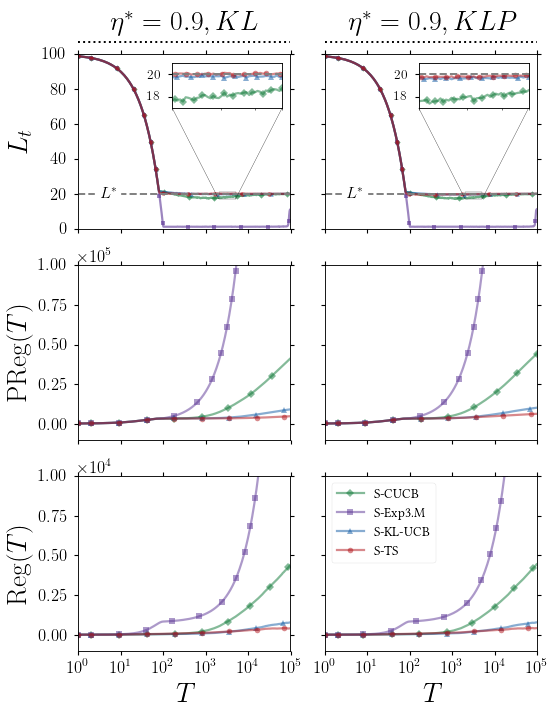

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [21]:
%matplotlib notebook

fig, axes = plt.subplots(3, 2, sharey='row', sharex=True, figsize=(7,9))
axees = axes.flatten()

scalingstrategies = ['KL-1-100-0.9', 'KLP-1-100-0.9']
targets = [20,20]
netas = [0.9,0.9]
pullrefs = [np.full(100000,20), np.full(100000,20)]

# top plots
offset = 0

for j,scalingstrategy in enumerate(scalingstrategies):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    data_grouped = subdata[subdata["scalingstrategy"] == scalingstrategy].groupby("bandit")
    
    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        df = df.sort_values("iteration").reset_index()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        df = df.iloc[[0] + list(indices)]
        name = df['bandit'][0]
        if(name in ["OD", "OR"]):
            pass
        else:
            lw = 2
            df['k'].plot(label=prettynames[name], linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                markevery=0.1, alpha=0.6, markersize=4,# logx=True,
                               marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    plt.axhline(y=targets[j], linestyle="--", c="grey")
    plt.text(5, targets[j], "$L^*$", fontsize=15, va='center', ha='center', backgroundcolor='w')
    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel("$L_t$")
        
    plt.ylim((0,100))
    plt.title(r'$\eta^* = %s, %s$'%(netas[j], scalingstrategy.split("-")[0]), y=1.1)
    plt.axhline(y=107, c="black", linestyle=":", clip_on=False)

    ax = plt.gca()
    from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
    axins = zoomed_inset_axes(ax, 6.5, loc=1)

    for i,df in data_grouped:
        df = df.sort_values("iteration").reset_index()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        df = df.iloc[[0] + list(indices)]
        name = df['bandit'][0]
        if(name in ["OD", "OR"]):
            pass
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                df['k'].plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                df['k'].plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    x1, x2, y1, y2 = 2000, 5000, targets[j]-3, targets[j]+1 # specify the limits
    axins.set_xlim(x1, x2) # apply the x-limits
    axins.set_ylim(y1, y2) # apply the y-limits

    axins.tick_params(axis='x',which='both',labelbottom='off')
    plt.tick_params(axis="both", labelsize=12)

    plt.axhline(y=targets[j], linestyle="--", c="grey")
    plt.yticks([targets[j],targets[j]-2], ["$%s$"%(targets[j]),"$%s$"%(targets[j]-2)])

    from mpl_toolkits.axes_grid1.inset_locator import mark_inset
    mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.1")
    
# middle plots   
offset = 2

for j,scalingstrategy in enumerate(scalingstrategies):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    data_grouped = subdata[subdata["scalingstrategy"] == scalingstrategy].groupby("bandit")
    
    pullref = pullrefs[j]

    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        ks = df.sort_values("iteration").reset_index().k
        regret = np.abs(pullref - ks)
        cumsum = regret.cumsum()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        cumsum = cumsum.iloc[[0] + list(indices)]
        name = df.iloc[0,0]
        if(name in ["OD", "OR"]):
            pass # do not plot it 
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel("$\mathrm{PReg}(T)$")
        
    plt.ylim((-10000,100000))

    
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    
# lower plots 
offset = 4


for j,scalingstrategy in enumerate(scalingstrategies):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    data_grouped = subdata[subdata["scalingstrategy"] == scalingstrategy].groupby("bandit")
    
    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        ks = df.sort_values("iteration").reset_index().k
        gains = df.sort_values("iteration").reset_index().gain
        regret = [expected_gains[int((x-1)*100)]*x for x in ks] - gains
        cumsum = regret.cumsum()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        cumsum = cumsum.iloc[[0] + list(indices)]
        name = df.iloc[0,0]
        if(name in ["OD", "OR"]):
            pass # do not plot it 
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel(r"$\mathrm{Reg}(T)$")
    else:
        plt.legend(fontsize = 12, ncol=1, loc='best')
        
    plt.ylim((-1000,10000))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    
    plt.xlabel("$T$")
    plt.xticks([1,10,100,1000,10000,100000])
    
plt.tight_layout()
plt.savefig("static_experiment_KL_KLP.pdf")




<IPython.core.display.Javascript object>


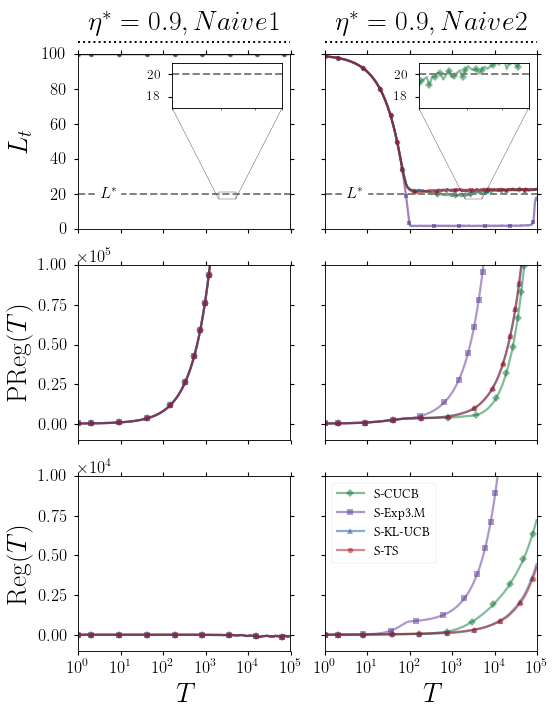

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [53]:
%matplotlib notebook

fig, axes = plt.subplots(3, 2, sharey='row', sharex=True, figsize=(7,9))
axees = axes.flatten()

scalingstrategies = ['Naive1-1-100-0.9-0.1', 'Naive2-1-100-0.0-0.9']
targets = [20,20]
netas = [0.9,0.9]
pullrefs = [np.full(100000,20), np.full(100000,20)]

# top plots
offset = 0

for j,scalingstrategy in enumerate(scalingstrategies):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    data_grouped = subdata[subdata["scalingstrategy"] == scalingstrategy].groupby("bandit")
    
    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        df = df.sort_values("iteration").reset_index()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        df = df.iloc[[0] + list(indices)]
        name = df['bandit'][0]
        if(name in ["OD", "OR"]):
            pass
        else:
            lw = 2
            df['k'].plot(label=prettynames[name], linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                markevery=0.1, alpha=0.6, markersize=4,# logx=True,
                               marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    plt.axhline(y=targets[j], linestyle="--", c="grey")
    plt.text(5, targets[j], "$L^*$", fontsize=15, va='center', ha='center', backgroundcolor='w')
    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel("$L_t$")
        
    plt.ylim((0,100))
    plt.title(r'$\eta^* = %s, %s$'%(netas[j], scalingstrategy.split("-")[0]), y=1.1)
    plt.axhline(y=107, c="black", linestyle=":", clip_on=False)

    ax = plt.gca()
    from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
    axins = zoomed_inset_axes(ax, 6.5, loc=1)

    for i,df in data_grouped:
        df = df.sort_values("iteration").reset_index()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        df = df.iloc[[0] + list(indices)]
        name = df['bandit'][0]
        if(name in ["OD", "OR"]):
            pass
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                df['k'].plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                df['k'].plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    x1, x2, y1, y2 = 2000, 5000, targets[j]-3, targets[j]+1 # specify the limits
    axins.set_xlim(x1, x2) # apply the x-limits
    axins.set_ylim(y1, y2) # apply the y-limits

    axins.tick_params(axis='x',which='both',labelbottom='off')
    plt.tick_params(axis="both", labelsize=12)

    plt.axhline(y=targets[j], linestyle="--", c="grey")
    plt.yticks([targets[j],targets[j]-2], ["$%s$"%(targets[j]),"$%s$"%(targets[j]-2)])

    from mpl_toolkits.axes_grid1.inset_locator import mark_inset
    mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.1")
    
# middle plots   
offset = 2

for j,scalingstrategy in enumerate(scalingstrategies):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    data_grouped = subdata[subdata["scalingstrategy"] == scalingstrategy].groupby("bandit")
    
    pullref = pullrefs[j]

    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        ks = df.sort_values("iteration").reset_index().k
        regret = np.abs(pullref - ks)
        cumsum = regret.cumsum()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        cumsum = cumsum.iloc[[0] + list(indices)]
        name = df.iloc[0,0]
        if(name in ["OD", "OR"]):
            pass # do not plot it 
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel("$\mathrm{PReg}(T)$")
        
    plt.ylim((-10000,100000))

    
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    
# lower plots 
offset = 4


for j,scalingstrategy in enumerate(scalingstrategies):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    data_grouped = subdata[subdata["scalingstrategy"] == scalingstrategy].groupby("bandit")
    
    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        ks = df.sort_values("iteration").reset_index().k
        gains = df.sort_values("iteration").reset_index().gain
        regret = [expected_gains[int((x-1)*100)]*x for x in ks] - gains
        cumsum = regret.cumsum()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        cumsum = cumsum.iloc[[0] + list(indices)]
        name = df.iloc[0,0]
        if(name in ["OD", "OR"]):
            pass # do not plot it 
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel(r"$\mathrm{Reg}(T)$")
    else:
        plt.legend(fontsize = 12, ncol=1, loc='best')
        
    plt.ylim((-1000,10000))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    
    plt.xlabel("$T$")
    plt.xticks([1,10,100,1000,10000,100000])
    
plt.tight_layout()
plt.savefig("static_experiment_Naive1_Naive2.pdf")




<IPython.core.display.Javascript object>


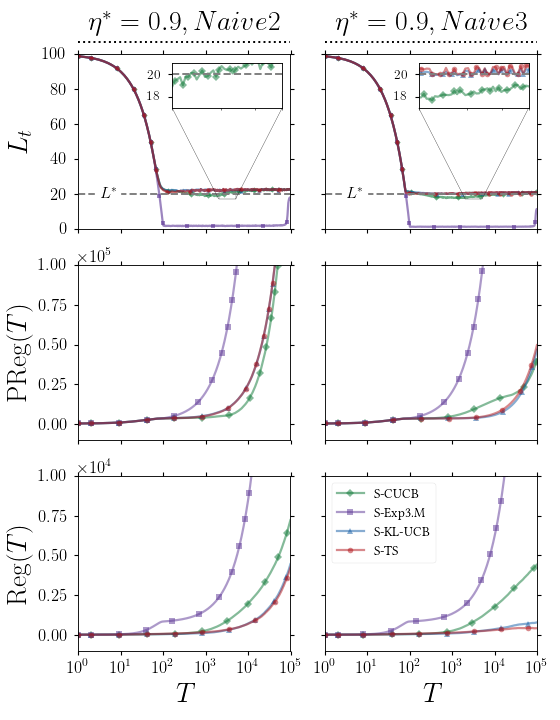

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [54]:
%matplotlib notebook

fig, axes = plt.subplots(3, 2, sharey='row', sharex=True, figsize=(7,9))
axees = axes.flatten()

scalingstrategies = ['Naive2-1-100-0.0-0.9', 'Naive3-1-100-0.0-0.9']
targets = [20,20]
netas = [0.9,0.9]
pullrefs = [np.full(100000,20), np.full(100000,20)]

# top plots
offset = 0

for j,scalingstrategy in enumerate(scalingstrategies):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    data_grouped = subdata[subdata["scalingstrategy"] == scalingstrategy].groupby("bandit")
    
    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        df = df.sort_values("iteration").reset_index()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        df = df.iloc[[0] + list(indices)]
        name = df['bandit'][0]
        if(name in ["OD", "OR"]):
            pass
        else:
            lw = 2
            df['k'].plot(label=prettynames[name], linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                markevery=0.1, alpha=0.6, markersize=4,# logx=True,
                               marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    plt.axhline(y=targets[j], linestyle="--", c="grey")
    plt.text(5, targets[j], "$L^*$", fontsize=15, va='center', ha='center', backgroundcolor='w')
    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel("$L_t$")
        
    plt.ylim((0,100))
    plt.title(r'$\eta^* = %s, %s$'%(netas[j], scalingstrategy.split("-")[0]), y=1.1)
    plt.axhline(y=107, c="black", linestyle=":", clip_on=False)

    ax = plt.gca()
    from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
    axins = zoomed_inset_axes(ax, 6.5, loc=1)

    for i,df in data_grouped:
        df = df.sort_values("iteration").reset_index()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        df = df.iloc[[0] + list(indices)]
        name = df['bandit'][0]
        if(name in ["OD", "OR"]):
            pass
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                df['k'].plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                df['k'].plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    x1, x2, y1, y2 = 2000, 5000, targets[j]-3, targets[j]+1 # specify the limits
    axins.set_xlim(x1, x2) # apply the x-limits
    axins.set_ylim(y1, y2) # apply the y-limits

    axins.tick_params(axis='x',which='both',labelbottom='off')
    plt.tick_params(axis="both", labelsize=12)

    plt.axhline(y=targets[j], linestyle="--", c="grey")
    plt.yticks([targets[j],targets[j]-2], ["$%s$"%(targets[j]),"$%s$"%(targets[j]-2)])

    from mpl_toolkits.axes_grid1.inset_locator import mark_inset
    mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.1")
    
# middle plots   
offset = 2

for j,scalingstrategy in enumerate(scalingstrategies):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    data_grouped = subdata[subdata["scalingstrategy"] == scalingstrategy].groupby("bandit")
    
    pullref = pullrefs[j]

    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        ks = df.sort_values("iteration").reset_index().k
        regret = np.abs(pullref - ks)
        cumsum = regret.cumsum()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        cumsum = cumsum.iloc[[0] + list(indices)]
        name = df.iloc[0,0]
        if(name in ["OD", "OR"]):
            pass # do not plot it 
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel("$\mathrm{PReg}(T)$")
        
    plt.ylim((-10000,100000))

    
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    
# lower plots 
offset = 4


for j,scalingstrategy in enumerate(scalingstrategies):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    data_grouped = subdata[subdata["scalingstrategy"] == scalingstrategy].groupby("bandit")
    
    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        ks = df.sort_values("iteration").reset_index().k
        gains = df.sort_values("iteration").reset_index().gain
        regret = [expected_gains[int((x-1)*100)]*x for x in ks] - gains
        cumsum = regret.cumsum()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        cumsum = cumsum.iloc[[0] + list(indices)]
        name = df.iloc[0,0]
        if(name in ["OD", "OR"]):
            pass # do not plot it 
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel(r"$\mathrm{Reg}(T)$")
    else:
        plt.legend(fontsize = 12, ncol=1, loc='best')
        
    plt.ylim((-1000,10000))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    
    plt.xlabel("$T$")
    plt.xticks([1,10,100,1000,10000,100000])
    
plt.tight_layout()
plt.savefig("static_experiment_Naive2_Naive3.pdf")




<IPython.core.display.Javascript object>


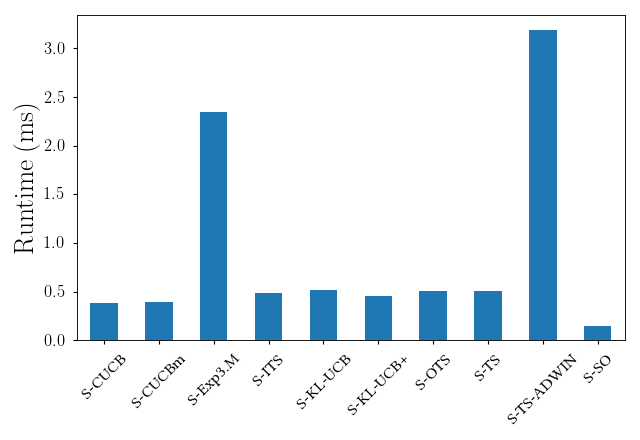

In [55]:
%matplotlib notebook
#algs = ["CUCB", "Exp3.M", "MP-KLUCB", "MP-TS", "MP-TS-ADWIN-0.1"]

means = masterdata.groupby("bandit").mean()
means.index = [prettynames[x] for x in means.index]
means["cputime"].plot(kind = "bar", rot=45)
plt.ylabel("$\mathrm{Runtime~(ms)}$")
plt.tight_layout()
#plt.savefig("static_Runtime.pdf")

<IPython.core.display.Javascript object>


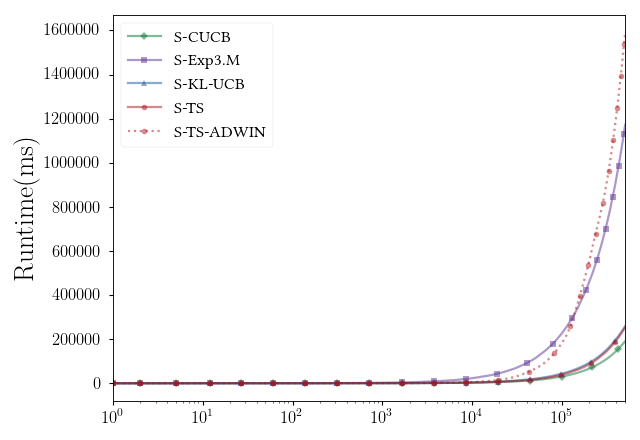

In [56]:
%matplotlib notebook

algs = ["CUCB", "Exp3.M", "MP-KLUCB", "MP-TS", "MP-TS-ADWIN-0.1"]

data_grouped = masterdata[masterdata["bandit"].isin(algs)].groupby("bandit")

for i,df in data_grouped:
    time = df.sort_values("iteration").reset_index().cputime
    cumsum = time.cumsum()
    name = df.iloc[0,0]

    lw = 2
    cumsum.plot(label=prettynames[name],linewidth=lw, logx=True,
                linestyle=styledictionary[name]['linestyle'],
                        markevery=0.05, alpha=0.5, markersize=5,
                       marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    plt.ylabel("$\mathrm{Runtime (ms)}$")
    plt.legend()
plt.tight_layout()
#plt.savefig("static_CumulativeRuntime.pdf")